In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',500)


In [4]:
import pandas as pd
import numpy as np
from numpy import math
m18 = pd.read_csv('motor_18_data.csv')

In [6]:
m18.head()

age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  Jitter(Abs)  \
0   72    0     5.6431       28.199       34.398    0.00662     0.000034   
1   72    0    12.6660       28.447       34.894    0.00300     0.000017   
2   72    0    19.6810       28.695       35.389    0.00481     0.000025   
3   72    0    25.6470       28.905       35.810    0.00528     0.000027   
4   72    0    33.6420       29.187       36.375    0.00335     0.000020   

   Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  \
0     0.00401      0.00317     0.01204  0.02565        0.230       0.01438   
1     0.00132      0.00150     0.00395  0.02024        0.179       0.00994   
2     0.00205      0.00208     0.00616  0.01675        0.181       0.00734   
3     0.00191      0.00264     0.00573  0.02309        0.327       0.01106   
4     0.00093      0.00130     0.00278  0.01703        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361

In [7]:
print(m18.shape)

(5875, 21)


In [5]:
dependent_variable = 'motor_UPDRS'
independent = m18.columns.tolist()
independent.remove(dependent_variable)
independent

['age',
 'sex',
 'test_time',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [8]:
m18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   motor_UPDRS    5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [9]:
X =m18[independent].values
Y =m18.iloc[:, [3]].values

In [10]:
X.shape

(5875, 20)

In [11]:
print(Y.shape)
Y

(5875, 1)


array([[28.199],
       [28.447],
       [28.695],
       ...,
       [21.495],
       [21.007],
       [20.513]])

In [12]:
# load and summarize the dataset
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 20) (4112, 1)
Test (1763, 20) (1763, 1)


In [14]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame containing the dataset
# For example:
# data = pd.read_csv('your_dataset.csv')

# Calculate the correlation matrix
cor = m18.corr()

# Correlation with the output variable (assuming 'motor_UPDRS' is your target variable)
cor_target = abs(cor['motor_UPDRS'])

# Selecting highly correlated features (example threshold > 0.1)
relevant_features = cor_target[cor_target > 0.1]

# Print or use relevant_features as needed
print("Highly correlated features:")
print(relevant_features)


Highly correlated features:
age              0.273665
motor_UPDRS      1.000000
total_UPDRS      0.947231
Shimmer          0.102349
Shimmer(dB)      0.110076
Shimmer:APQ11    0.136560
HNR              0.157029
RPDE             0.128607
DFA              0.116242
PPE              0.162433
Name: motor_UPDRS, dtype: float64


Feature 0: 8.502042
Feature 1: 4.351774
Feature 2: 79.901832
Feature 3: 14.764190
Feature 4: 37.772513
Feature 5: 54.973124
Feature 6: 49.941979
Feature 7: 10.809860
Feature 8: 0.009070
Feature 9: 23.622756
Feature 10: 41.532074
Feature 11: 16.614572
Feature 12: 175.888510
Feature 13: 5.028994
Feature 14: 2.834823
Feature 15: 0.036797
Feature 16: 30.908959
Feature 17: 63.986054
Feature 18: 2.030617
Feature 19: 0.086619


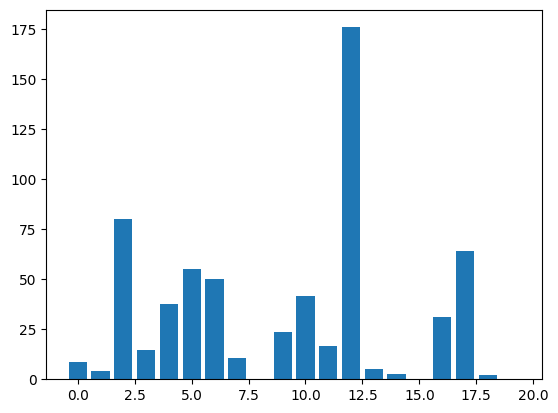

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Feature selection
def select_features(X_train, y_train, X_test):
    # Configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # Learn relationship from training data
    fs.fit(X_train, y_train)
    # Transform train input data
    X_train_fs = fs.transform(X_train)
    # Transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Print the scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


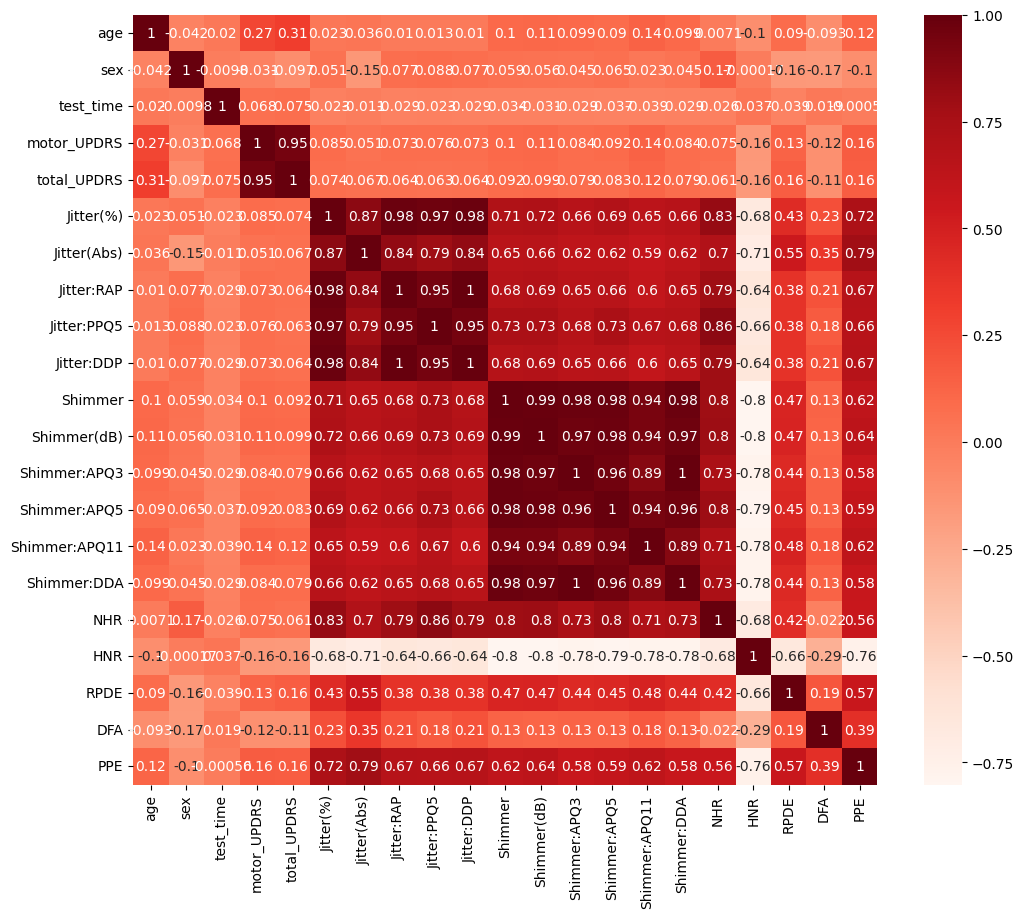

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = m18.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
#Correlation with output variable
cor_target = abs(cor['motor_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age              0.273665
motor_UPDRS      1.000000
total_UPDRS      0.947231
Shimmer          0.102349
Shimmer(dB)      0.110076
Shimmer:APQ11    0.136560
HNR              0.157029
RPDE             0.128607
DFA              0.116242
PPE              0.162433
Name: motor_UPDRS, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
    "Multi-layer Perceptron": MLPClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train, predict, and evaluate each classifier
for name, model in classifiers.items():
    try:
        model.fit(X_train_fs, y_train)
        y_pred = model.predict(X_test_fs)
        y_proba = model.predict_proba(X_test_fs)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        f1 = f1_score(y_test, y_pred)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)  # Recall
        specificity = tn / (tn + fp)
        false_positive_rate = fp / (fp + tn)
        false_negative_rate = fn / (fn + tp)
        geometric_mean = (sensitivity * specificity) ** 0.5

        print(f"Results for {name}:")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        if auc is not None:
            print(f"AUC: {auc:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(f"Sensitivity (Recall): {sensitivity:.2f}")
        print(f"Specificity: {specificity:.2f}")
        print(f"False Positive Rate: {false_positive_rate:.2f}")
        print(f"False Negative Rate: {false_negative_rate:.2f}")
        print(f"Geometric Mean: {geometric_mean:.2f}")
        print("\n")
    except Exception as e:
        print(f"Error with classifier {name}: {e}")


Results for Decision Tree:
Accuracy: 85.00%
AUC: 0.85
F1 Score: 0.85
Sensitivity (Recall): 0.83
Specificity: 0.88
False Positive Rate: 0.12
False Negative Rate: 0.17
Geometric Mean: 0.85


Results for Gaussian Naive Bayes:
Accuracy: 81.33%
AUC: 0.89
F1 Score: 0.80
Sensitivity (Recall): 0.74
Specificity: 0.89
False Positive Rate: 0.11
False Negative Rate: 0.26
Geometric Mean: 0.81


Results for Support Vector Machine:
Accuracy: 83.33%
AUC: 0.91
F1 Score: 0.83
Sensitivity (Recall): 0.81
Specificity: 0.86
False Positive Rate: 0.14
False Negative Rate: 0.19
Geometric Mean: 0.83


Results for Multi-layer Perceptron:
Accuracy: 83.00%
AUC: 0.91
F1 Score: 0.83
Sensitivity (Recall): 0.83
Specificity: 0.83
False Positive Rate: 0.17
False Negative Rate: 0.17
Geometric Mean: 0.83


Results for XGBoost:
Accuracy: 89.67%
AUC: 0.94
F1 Score: 0.89
Sensitivity (Recall): 0.85
Specificity: 0.94
False Positive Rate: 0.06
False Negative Rate: 0.15
Geometric Mean: 0.90


Results for Random Forest:
Accuracy:

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc  # Add this import for ROC curve plotting

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train_fs, X_test_fs, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
    "Multi-layer Perceptron": MLPClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train, predict, and evaluate each classifier
roc_results = {}
for name, model in classifiers.items():
    try:
        model.fit(X_train_fs, y_train)
        y_proba = model.predict_proba(X_test_fs)[:, 1] if hasattr(model, "predict_proba") else None

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        roc_results[name] = (fpr, tpr, roc_auc)

    except Exception as e:
        print(f"Error with classifier {name}: {e}")

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


C:\Users\Surakshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Error with classifier Stochastic Gradient Descent: y should be a 1d array, got an array of shape () instead.
